In [217]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import pandas_datareader as web
import scipy.stats as scs
import statsmodels.api as sm
#pyplot had to be imported

In [53]:
#!pip install -q pandas_datareader
#import pandas_datareader as web
#install package each time - can't call pandas directly

In [59]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

In [60]:
def yprices(name, start, end):
    '''    
        Arguments: 
            name(string)    : input the ticker for the desired stock
            start(datetime) : Setting a starting date
            end(datetime)   : Setting a ending date 
         Returns:
            The function returns a Pandas DataFrame webscraped from yahoo finance containing the Date, High, Low, Close, Adj Close and Volume for the inquired stock 
            More information can be found at https://github.com/ranaroussi/fix-yahoo-finance
    '''
    yf.pdr_override() # Command to override the pandas search function
    return pdr.get_data_yahoo(name, start, end)

In [160]:
symbols = ['AAPL', 'MSFT', 'SPY', 'GLD']
noa = len(symbols)
# this is a list that will then be looped for a dataframe

In [161]:
type(noa)

int

In [162]:
start = datetime.datetime(2010, 4, 1)
#datetime for pulling quotes

In [163]:
end = datetime.datetime(2018, 6, 29)

In [164]:
f = yprices(symbols, start, end)['Adj Close']
f.head(1)
#check if the Datareader is working

[*********************100%***********************]  4 of 4 downloaded


,AAPL,GLD,MSFT,SPY
Date,,,,
2010-03-31,22.385527,108.949997,23.404469,97.579323


In [165]:
data = pd.DataFrame()
for sym in symbols:
 data[sym] = yprices(sym, start, end)['Adj Close']
data.columns = symbols
#loop that creates a dataframe
data.head(1)


[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


,AAPL,MSFT,SPY,GLD
Date,,,,
2010-03-31,22.385527,23.404469,97.579323,108.949997


In [166]:
data.tail(1)

,AAPL,MSFT,SPY,GLD
Date,,,,
2018-06-28,183.422302,97.413246,266.927887,118.220001


In [212]:
def print_statistics(array):
    ''' Prints selected statistics.
    Parameters
    ==========
    array: ndarray
    object to generate statistics on
    '''
    sta = scs.describe(array)
    print('%14s %15s' % ('statistic', 'value'))
    print(30 * '-')
    print('%14s %15.5f' % ('size', sta[0]))
    print('%14s %15.5f' % ('min', sta[1][0]))
    print('%14s %15.5f' % ('max', sta[1][1]))
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', np.sqrt(sta[3])))
    print('%14s %15.5f' % ('skew', sta[4]))
    print('%14s %15.5f' % ('kurtosis', sta[5]))

The normal distribution can be considered the most important distribution in
finance and one of the major statistical building blocks of financial theory.
Among others, the following cornerstones of financial theory rest to a large
extent on the assumption that returns of a financial instrument are normally
distributed:

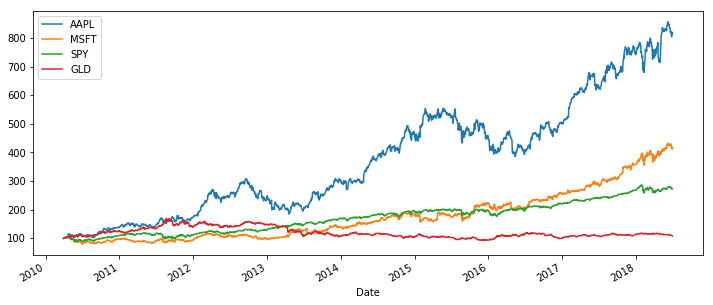

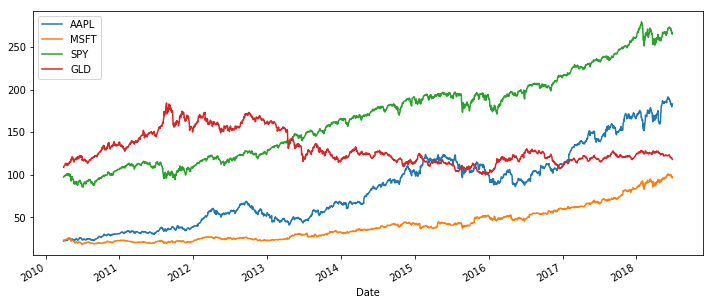

In [167]:
(data / data.iloc[0] * 100).plot(figsize=(12, 5))
(data).plot(figsize=(12, 5))
#ix is depreciated, replaced by iloc
#this normals the data to a zero base

In [168]:
rets = np.log(data / data.shift(1))
#new column for returns based on position above
#this uses log returns
rets.info()
#info show that the dataframe is empty for the first column, there's no shift down
rets.head(2)
#check for log returns 
#for NFLX the simple return 0.012165
#log returns are lower when positive and higher when negative (until infinite)
#they're also symmetrical

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2077 entries, 2010-03-31 to 2018-06-28
Data columns (total 4 columns):
AAPL    2076 non-null float64
MSFT    2076 non-null float64
SPY     2076 non-null float64
GLD     2076 non-null float64
dtypes: float64(4)
memory usage: 81.1 KB


,AAPL,MSFT,SPY,GLD
Date,,,,
2010-03-31,NaN,NaN,NaN,NaN
2010-04-01,0.004119,-0.004449,0.006815,0.011952


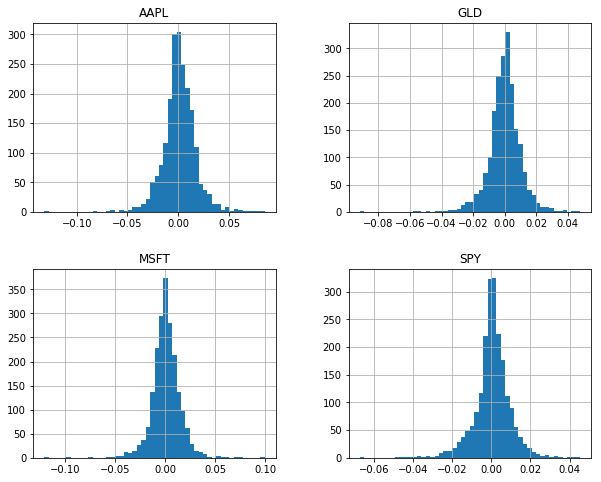

In [207]:
rets.hist(bins=50, figsize=(10, 8));

In [215]:
for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(30 * '-')
    log_data = np.array(rets[sym].dropna())
    print_statistics(log_data)


Results for symbol AAPL
------------------------------
     statistic           value
------------------------------
          size      2076.00000
           min        -0.13188
           max         0.08502
          mean         0.00101
           std         0.01599
          skew        -0.17951
      kurtosis         4.85306

Results for symbol MSFT
------------------------------
     statistic           value
------------------------------
          size      2076.00000
           min        -0.12103
           max         0.09941
          mean         0.00069
           std         0.01426
          skew        -0.08361
      kurtosis         7.37509

Results for symbol SPY
------------------------------
     statistic           value
------------------------------
          size      2076.00000
           min        -0.06734
           max         0.04545
          mean         0.00048
           std         0.00932
          skew        -0.51778
      kurtosis         4.64

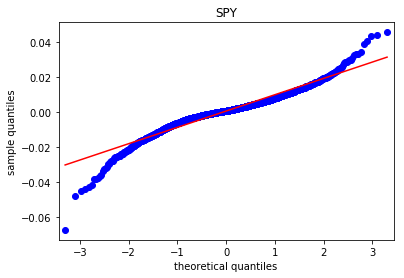

In [219]:
sm.qqplot(rets['SPY'].dropna(), line='s')
plt.title('SPY')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

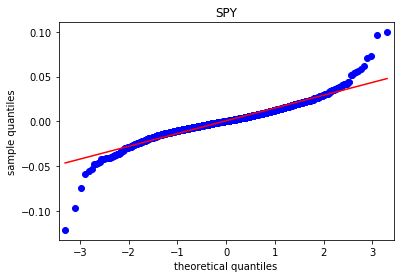

In [222]:
sm.qqplot(rets['MSFT'].dropna(), line='s')
plt.title('SPY')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

In [226]:
for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(32 * '-')
    log_data = np.array(rets[sym].dropna())
    normality_tests(log_data)


Results for symbol AAPL
--------------------------------
Skew of data set         -0.180
Skew test p-value          0.001
Kurt of data set          4.853
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol MSFT
--------------------------------
Skew of data set         -0.084
Skew test p-value          0.119
Kurt of data set          7.375
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol SPY
--------------------------------
Skew of data set         -0.518
Skew test p-value          0.000
Kurt of data set          4.643
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol GLD
--------------------------------
Skew of data set         -0.600
Skew test p-value          0.000
Kurt of data set          5.875
Kurt test p-value          0.000
Norm test p-value          0.000


In [224]:
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
    Parameters
    ==========
    array: ndarray
    object to generate statistics on
    '''
    print('Skew of data set %14.3f' % scs.skew(arr))
    print('Skew test p-value %14.3f' % scs.skewtest(arr)[1])
    print('Kurt of data set %14.3f' % scs.kurtosis(arr))
    print('Kurt test p-value %14.3f' % scs.kurtosistest(arr)[1])
    print('Norm test p-value %14.3f' % scs.normaltest(arr)[1])

In [169]:
rets.mean() * 252
#simple arithmetic mean 

AAPL    0.255323
MSFT    0.173103
SPY     0.122154
GLD     0.009912
dtype: float64

In [170]:
rets.cov()*252
#covariance happens on the daily
#there are copies of figures AAPL & NFLX = NFLX & AAPL

,AAPL,MSFT,SPY,GLD
AAPL,0.064440,0.023482,0.020723,0.001092
MSFT,0.023482,0.051259,0.022349,-0.000754
SPY,0.020723,0.022349,0.021889,-0.000368
GLD,0.001092,-0.000754,-0.000368,0.025989


In [171]:
weights = np.random.random(noa)
weights /= np.sum(weights)
#new numpy array of 4 random number that add up to 1
#second line assures weight are equal to 1
weights

array([0.08875514, 0.07040928, 0.46599876, 0.37483682])

In [172]:
np.sum(rets.mean() * weights) * 252
#using FANG Sept 2018 returns if FB is a high weighting, low returns, NFLX high weighting, higher returns

0.09548817702773213

In [173]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))
#rets is a pandas dataframe, weights is a numpy array 
#in order to work the size of the two arrays need to be equal 
#this only works with a dot in a dot which is a numpy array

0.012545087596952989

In [174]:
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))


0.112004855238302

In [175]:
prets = []
pvols = []
#prets and vols are np.arrays
for p in range (25000):
 #loop underlines number of iterations for a random waiting
 weights = np.random.random(noa)
 weights /= np.sum(weights)
 #this makes it equal to 1
 prets.append(np.sum(rets.mean() * weights) * 252)
 #i get a value for each loop
 pvols.append(np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights))))
  #covariance value for each loop

prets = np.array(prets)
pvols = np.array(pvols)
#turns prets and pvols from lists into numpy arrays

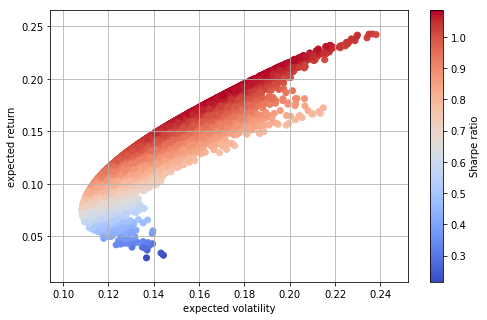

In [176]:
plt.figure(figsize=(8, 5))
plt.scatter(pvols, prets, c = prets / pvols, marker='o', cmap='coolwarm')
# c is a calculated column of a sharpe ratio minus a risk free rate
# x-axis, y-axis, marker allows me to change the point style
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [177]:
def statistics(weights):
     weights = np.array(weights)
     pret = np.sum(rets.mean() * weights) * 252
     pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
     return np.array([pret, pvol, pret / pvol])
     #this is a callable function that repeats work above

In [178]:
import scipy.optimize as sco
#this is a module

In [179]:
def min_func_sharpe(weights):
     return -statistics(weights)[2]
    #I think this is calling the eariler function - without the [2], the minimization crashes

In [180]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
#this is a dictionary with two objects, that constrains the optimization

In [181]:
bnds = tuple((0, 1) for x in range(noa))
#tuple, like a list, for each stock between 0 and 1 - this is bounds

In [182]:
noa * [1. / noa,]
#equal distribution of weight that sum to 1 


[0.25, 0.25, 0.25, 0.25]

In [183]:
%%time
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP', bounds=bnds, constraints=cons)
#this is a scipy function, calls stats function, then a list of weighting, a type of minimization, bounds are required as list

Wall time: 97.2 ms


In [184]:
opts

     fun: -1.0859476185861137
     jac: array([ 5.66244125e-07, -2.70575285e-04,  2.84254551e-04,  1.29550695e-04])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.50213041, 0.24101762, 0.2046997 , 0.05215227])

In [185]:
opts['x'].round(3)
#creates nparray based on key 'x' from the optimization, and rounds to 3 digits

array([0.502, 0.241, 0.205, 0.052])

In [186]:
statistics(opts['x']).round(3)

array([0.195, 0.18 , 1.086])

In [187]:
def min_func_variance(weights):
     return statistics(weights)[1] ** 2

In [188]:
%%time
optv = sco.minimize(min_func_variance, noa * [1. / noa,], method='SLSQP', bounds=bnds,
constraints=cons)

Wall time: 138 ms


In [189]:
optv

     fun: 0.011703389130517418
     jac: array([0.02403236, 0.02338921, 0.02321334, 0.02361807])
 message: 'Optimization terminated successfully.'
    nfev: 48
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([8.09392493e-03, 6.93889390e-18, 5.30351519e-01, 4.61554556e-01])

In [190]:
optv['x'].round(3)

array([0.008, 0.   , 0.53 , 0.462])

In [191]:
statistics(optv['x']).round(3)

array([0.071, 0.108, 0.66 ])

### EFFICIENT FRONTIER

In [192]:
cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret},
{'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)
#normal bounds for optimization

In [193]:
def min_func_port(weights):
     return statistics(weights)[1]

In [194]:
%%time
trets = np.linspace(0.0, 0.25, 50)
#50 iterations, and the bounds
tvols = []
for tret in trets:
 cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret}, {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
 res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP', bounds=bnds, constraints=cons)
 tvols.append(res['fun'])
tvols = np.array(tvols)

Wall time: 15.2 s


In [195]:
tvols

array([0.16121148, 0.16121148, 0.16078688, 0.1535193 , 0.14657702,
       0.14000847, 0.13386866, 0.1282192 , 0.1231276 , 0.11866569,
       0.11490685, 0.11192194, 0.10977411, 0.10851308, 0.10816592,
       0.10838043, 0.10891207, 0.10975627, 0.11090523, 0.11235059,
       0.11408068, 0.11608277, 0.11834306, 0.12084738, 0.12357997,
       0.12652693, 0.12967337, 0.1330051 , 0.13650886, 0.14017095,
       0.14398006, 0.14792458, 0.15199398, 0.15617848, 0.16046909,
       0.16485751, 0.16934149, 0.17389871, 0.17853747, 0.1832504 ,
       0.18802501, 0.19285859, 0.1977665 , 0.20282043, 0.20802164,
       0.21339204, 0.21957757, 0.22676373, 0.23485868, 0.24377192])

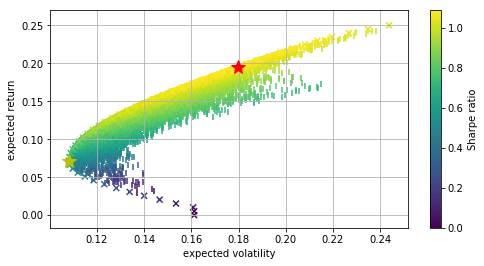

In [196]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets,
 c=prets / pvols, marker='|')
 # random portfolio composition
plt.scatter(tvols, trets,
 c=trets / tvols, marker='x')
 # efficient frontier
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
 'r*', markersize=15.0)
 # portfolio with highest Sharpe ratio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],
 'y*', markersize=15.0)
 # minimum variance portfolio
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

### CAPITAL MARKET LINE

In [197]:
import scipy.interpolate as sci

In [198]:
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

In [199]:
tck = sci.splrep(evols, erets)

In [200]:
def f(x):
#Efficient frontier function (splines approximation)
 return sci.splev(x, tck, der=0)
def df(x):
#First derivative of efficient frontier function
 return sci.splev(x, tck, der=1)

In [201]:
def equations(p, rf=0.01):
 eq1 = rf - p[0]
 eq2 = rf + p[1] * p[2] - f(p[2])
 eq3 = p[1] - df(p[2])
 return eq1, eq2, eq3

In [202]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])

In [203]:
opt


array([0.01      , 1.03298085, 0.19673064])

In [204]:
np.round(equations(opt), 6)

array([ 0., -0.,  0.])

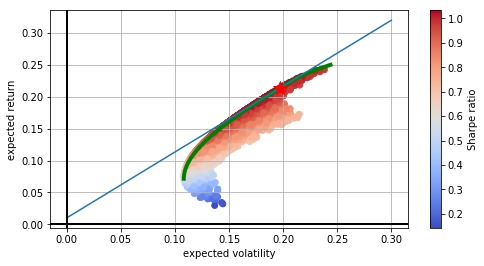

In [205]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets,
 c=(prets - 0.01) / pvols, marker='o', cmap='coolwarm')
 # random portfolio composition
plt.plot(evols, erets, 'g', lw=4.0)
 # efficient frontier
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.5)
 # capital market line
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0)
plt.grid(True)
plt.axhline(0, color='k', ls='-', lw=2.0)
plt.axvline(0, color='k', ls='-', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')